In [2]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
plt.rc('font', size=12)

## Usual network utilization

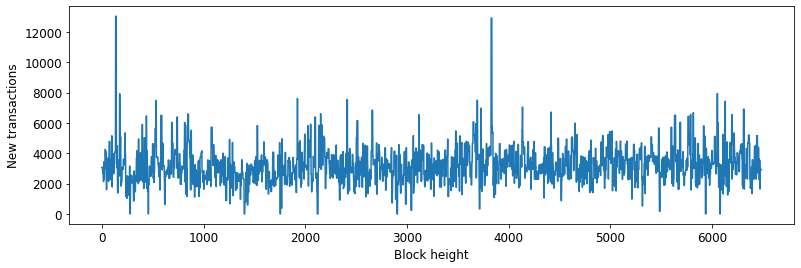

In [30]:
f = open('../results/demand-scenario01.txt', "r")
file_content = f.read()
f.close()
ds = literal_eval(file_content)
f2 = plt.figure()
f2.set_figwidth(13)
plt.xlabel("Block height")
plt.ylabel("New transactions")
plt.plot(ds)
plt.savefig('../results/experiments/input_usual.pdf')

### Experiment I

In [31]:
# f1 = open('../results/eth-chart.txt', "r")
# file_content1 = f1.read()
# f1.close()
# ethprice = literal_eval(file_content1)
# f2 = open('../results/gas-chart.txt', "r")
# file_content2 = f2.read()
# f2.close()
# gasprice = literal_eval(file_content2)

# corr = np.corrcoef(ds,mean)
# # corr = scipy.stats.kendalltau(ethprice, gasprice)
# print(corr)
# f3 = plt.figure()
# f3.set_figwidth(6)
# f3.set_figheight(3.5)
# plt.xlabel("Ethereum Price")
# plt.ylabel("Gas Price")
# plt.scatter(ethprice,gasprice)

In [32]:
# # corr = np.corrcoef(ds,mean)
# corr = scipy.stats.kendalltau(ds, mean)
# print(corr)
# f4 = plt.figure()
# f4.set_figwidth(6)
# f4.set_figheight(3.5)
# plt.xlabel("Demand scenario")
# plt.ylabel("Average gas prices")
# plt.scatter(ds,mean)
# plt.savefig('../results/exp1_2.pdf')

### Experiment II

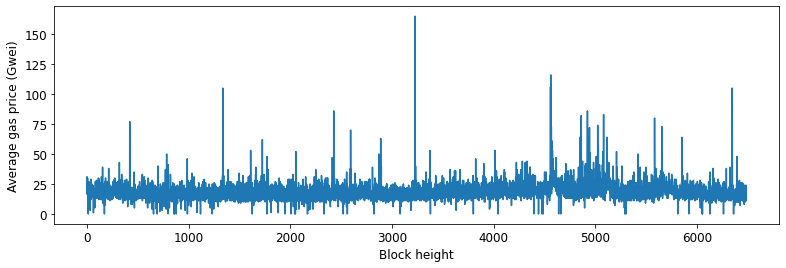

In [33]:
f = open('../results/average-fees01.txt', "r")
file_content = f.read()
f.close()
mean = literal_eval(file_content)
f2 = plt.figure()
f2.set_figwidth(13)
plt.xlabel("Block height")
plt.ylabel("Average gas price (Gwei)")
plt.plot(mean, label = "Average gas price (arithmetic mean)")
plt.savefig('../results/experiments/exp2_1.pdf')

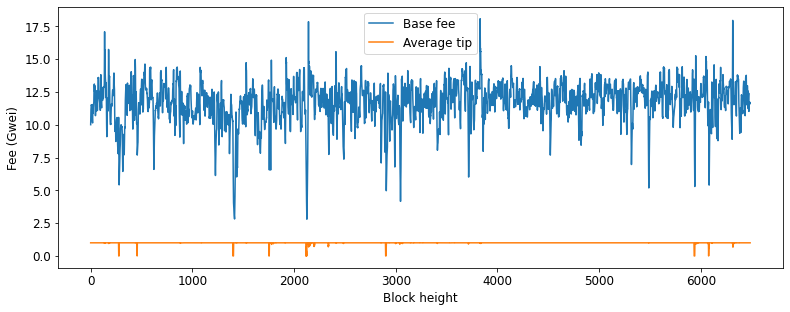

In [34]:
normal = pd.read_pickle("../results/normal.pkl")
bf1 = normal.basefee
incl1 = normal.included_txs

normal.plot("block", ["basefee", "blk_avg_tip"], label=["Base fee", "Average tip"], figsize=(13,4.8))
plt.xlabel("Block height")
plt.ylabel("Fee (Gwei)")
plt.savefig('../results/experiments/exp2_2.pdf')

In [35]:
# legacy = pd.read_pickle("../results/legacy.pkl")

# pool_length_scaled = []
# for x in legacy.pool_length:
#     pool_length_scaled.append(x*10)

# f = plt.figure()
# f.set_figwidth(13)
# plt.xlabel("Block height")
# plt.ylabel("Transactions in mempool")
# plt.plot(normal.pool_length[:3500], label ="EIP-1559")
# plt.plot(pool_length_scaled, label ="First price auction")
# plt.legend()
# plt.savefig('../results/experiments/exp2_3.pdf')

KendalltauResult(correlation=0.6797126113988435, pvalue=0.0)


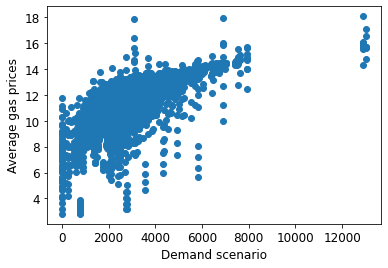

In [36]:
#TODO
# corr = np.corrcoef(ds,mean)
corr_ds = ds * 1 # hard copy of the list
corr_bf = normal.basefee * 1
corr_bf.pop(0)
corr_ds.pop()


corr = scipy.stats.kendalltau(corr_ds, corr_bf)
print(corr)
f4 = plt.figure()
plt.xlabel("Demand scenario")
plt.ylabel("Average gas prices")
plt.scatter(corr_ds,corr_bf)
# plt.savefig('../results/exp1_2.pdf')

### Experiment III

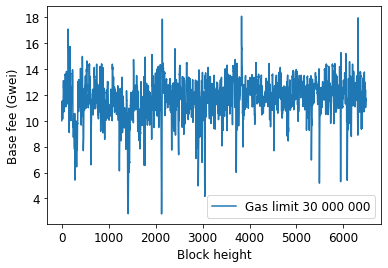

In [37]:
limitx2 = pd.read_pickle("../results/gaslimitx2.pkl")
plt.xlabel("Block height")
plt.ylabel("Base fee (Gwei)")
plt.plot(bf1, label ="Gas limit 30 000 000")
plt.legend()
plt.savefig('../results/experiments/exp3_1.pdf')

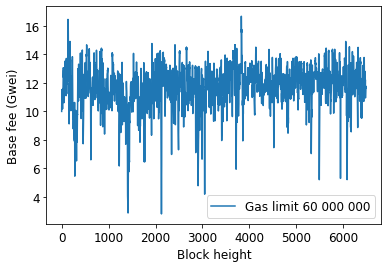

In [38]:
plt.xlabel("Block height")
plt.ylabel("Base fee (Gwei)")
plt.plot(limitx2.basefee, label ="Gas limit 60 000 000")
plt.legend()
plt.savefig('../results/experiments/exp3_2.pdf')

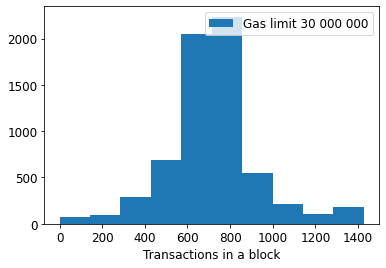

In [39]:
plt.hist(incl1, label ="Gas limit 30 000 000")
plt.xlabel("Transactions in a block")
plt.legend()
plt.savefig('../results/experiments/exp3_3.pdf')

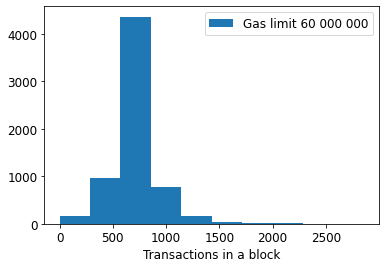

In [40]:
plt.hist(limitx2.included_txs, label ="Gas limit 60 000 000")
plt.xlabel("Transactions in a block")
plt.legend()
plt.savefig('../results/experiments/exp3_4.pdf')

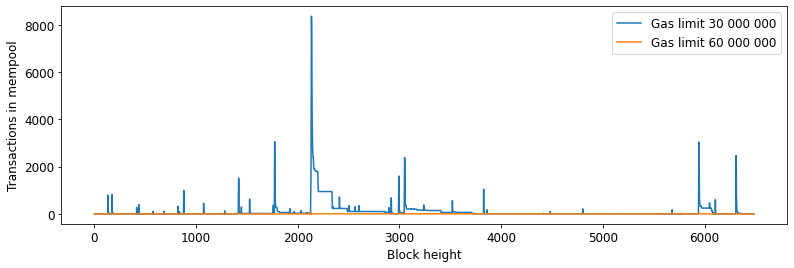

In [41]:
f = plt.figure()
f.set_figwidth(13)
plt.xlabel("Block height")
plt.ylabel("Transactions in mempool")
plt.plot(normal.pool_length, label ="Gas limit 30 000 000")
plt.plot(limitx2.pool_length, label ="Gas limit 60 000 000")
plt.legend()
plt.savefig('../results/experiments/exp3_5.pdf')

## Corner Cases

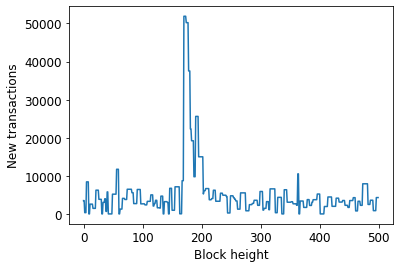

In [42]:
f = open('../results/demand-scenario02.txt', "r")
file_content = f.read()
f.close()
demand_scenario_cc = literal_eval(file_content)
plt.xlabel("Block height")
plt.ylabel("New transactions")
plt.plot(demand_scenario_cc[:500])
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('../results/experiments/input_cc_stats.pdf')

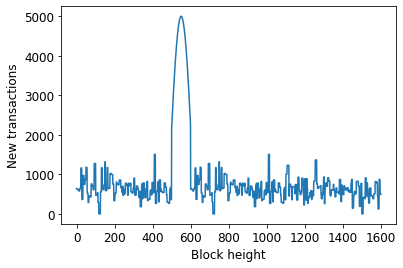

In [43]:
f = open('../results/demand-fluct.txt', "r")
file_content = f.read()
f.close()
dscc = literal_eval(file_content)
plt.xlabel("Block height")
plt.ylabel("New transactions")
plt.plot(dscc)
plt.savefig('../results/experiments/input_cc.pdf')

### Experiment IV

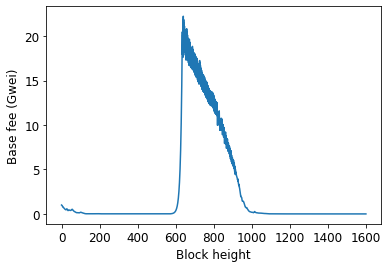

In [44]:
cornercase = pd.read_pickle("../results/cc-normal.pkl")
cornercase_l = pd.read_pickle("../results/cc-legacy.pkl")
cornercase.plot("block", "basefee", legend=None)
plt.xlabel("Block height")
plt.ylabel("Base fee (Gwei)")
plt.savefig('../results/experiments/exp4_1.pdf')

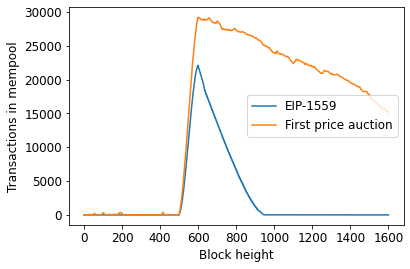

In [45]:
plt.xlabel("Block height")
plt.ylabel("Transactions in mempool")
plt.plot(cornercase.pool_length, label="EIP-1559")
plt.plot(cornercase_l.pool_length, label="First price auction")
plt.legend()
plt.savefig('../results/experiments/exp4_2.pdf')

In [46]:
cornercase[(cornercase.block > 600) & (cornercase.block < 700)]

,block,basefee,users,decided_txs,included_txs,blk_avg_gas_price,blk_avg_tip,pool_length
601,601,0.390646,639,59,142,1.390646,1.000000,21924
602,602,0.438890,634,53,142,1.438890,1.000000,21835
603,603,0.493093,608,42,142,1.493093,1.000000,21735
604,604,0.553990,582,55,142,1.553990,1.000000,21648
605,605,0.622408,598,44,142,1.622408,1.000000,21550
...,...,...,...,...,...,...,...,...
695,695,16.108816,1294,3,142,17.108816,1.000000,13920
696,696,18.098255,1256,0,3,18.473231,0.374976,13917
697,697,15.930989,1314,4,142,16.930989,1.000000,13779
698,698,17.898466,1251,0,12,18.209406,0.310940,13767


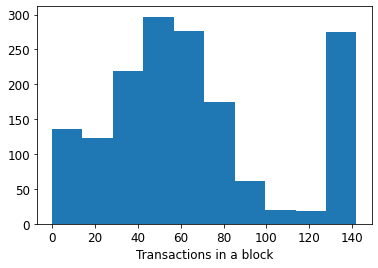

In [47]:
plt.hist(cornercase.included_txs)
plt.xlabel("Transactions in a block")
plt.savefig('../results/experiments/exp4_3.pdf')

### Experiment V

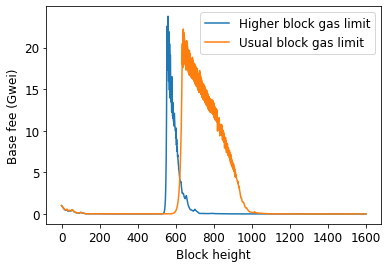

In [48]:
cornercase_lx2 = pd.read_pickle("../results/cc-gaslimitx2.pkl")
plt.xlabel("Block height")
plt.ylabel("Base fee (Gwei)")
plt.plot(cornercase_lx2.basefee, label="Higher block gas limit")
plt.plot(cornercase.basefee, label="Usual block gas limit")
plt.legend()
plt.savefig('../results/experiments/exp5_1.pdf')

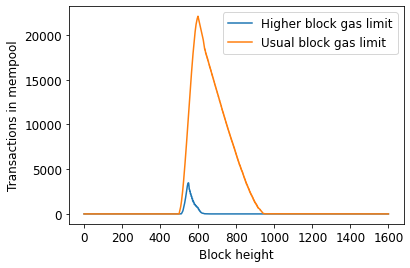

In [49]:
plt.xlabel("Block height")
plt.ylabel("Transactions in mempool")
plt.plot(cornercase_lx2.pool_length, label="Higher block gas limit")
plt.plot(cornercase.pool_length, label="Usual block gas limit")
plt.legend()
plt.savefig('../results/experiments/exp5_2.pdf')

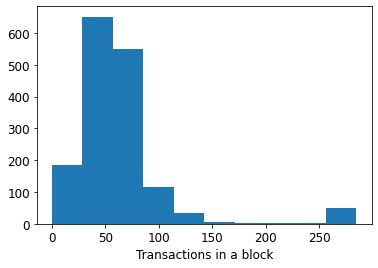

In [50]:
plt.hist(cornercase_lx2.included_txs)
plt.xlabel("Transactions in a block")
plt.savefig('../results/experiments/exp5_3.pdf')

### Experiment VI

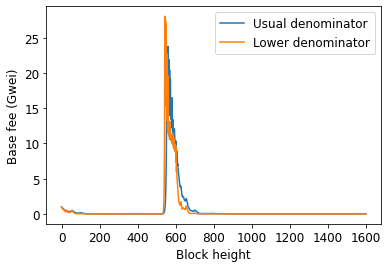

In [51]:
cornercase_denom = pd.read_pickle("../results/cc-denominator.pkl")
plt.xlabel("Block height")
plt.ylabel("Base fee (Gwei)")
plt.plot(cornercase_lx2.basefee, label="Usual denominator")
plt.plot(cornercase_denom.basefee, label="Lower denominator")
plt.legend()
plt.savefig('../results/experiments/exp6_1.pdf')

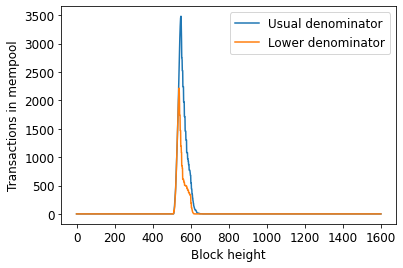

In [52]:
plt.xlabel("Block height")
plt.ylabel("Transactions in mempool")
plt.plot(cornercase_lx2.pool_length, label="Usual denominator")
plt.plot(cornercase_denom.pool_length, label="Lower denominator")
plt.legend()
plt.savefig('../results/experiments/exp6_2.pdf')

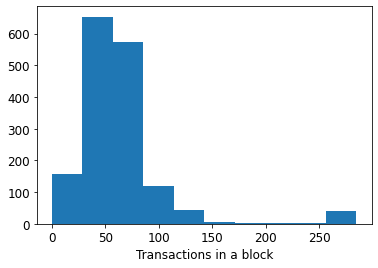

In [53]:
plt.hist(cornercase_denom.included_txs)
plt.xlabel("Transactions in a block")
plt.savefig('../results/experiments/exp6_3.pdf')